In [1]:
import cv2
import matplotlib.pyplot as plt

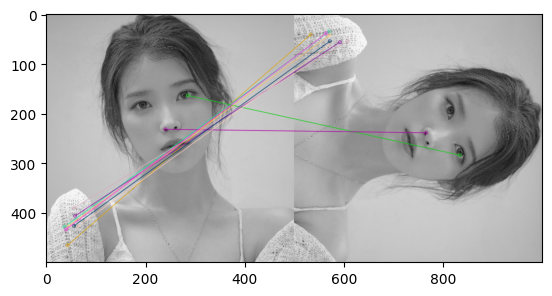

In [3]:
img1 = cv2.imread('./data/IU.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (500, 500))
img2 = cv2.imread('./data/IU.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (500, 500))
img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Brief 디스크립터 매칭
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

# 상위 N개 시각화
matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_img)
plt.show()